In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl

import math
import numpy as np
import pandas as pd
import tensorflow as tf
import socket
import importlib
import os
import sys
#BASE_DIR = os.path.dirname(os.path.abspath(__file__))
#sys.path.append(BASE_DIR)
from pointnetvlad_eval import *
from sklearn.neighbors import NearestNeighbors, KDTree


In [3]:
QUERY_PATH = 'pointnetvlad_submaps/'

RESULTS_FOLDER="testing_results/pointnetvlad/"
if not os.path.exists(RESULTS_FOLDER): os.mkdir(RESULTS_FOLDER)   

# One-time partial release case: Spatial inference using pointnetvlad

In [4]:
pickle_file = 'partial_results.pickle'

try:
    with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
        results_pickle = pickle.load(pickle_output)
except:
    print("No pickle file yet:",pickle_file)
    results_pickle = []
    
for radius in np.arange(0.25,3.1,0.25):
    
    query_fol = 'ransac_partial_radius_'+str(radius)+"_4096_unassisted"#
    
    QUERY_FILE = 'pointnetvlad_submaps/3d_{}_evaluation_query.pickle'.format(query_fol)
    
    output_file = RESULTS_FOLDER +pickle_file+query_fol+'.txt'
    
    QUERY_SETS= get_sets_dict(QUERY_FILE)

    query_partial_path = os.path.join(QUERY_PATH,query_fol)

    df_test= pd.read_csv(os.path.join(query_partial_path,"pointcloud_centroids_4m.csv"),sep=',')
    
    QUERY_DATABASE_NUMPY = np.asarray(df_test)
    
    print("Doing",QUERY_FILE,query_partial_path)
    
    ave_recall, ave_intra_dist = evaluate(QUERY_SETS, QUERY_DATABASE_NUMPY, output_file)
    
    results_pickle.append([
            radius,
            ave_recall,
            ave_intra_dist
        ])

    with open(RESULTS_FOLDER + pickle_file,'wb') as pickle_output:
        pickle.dump(results_pickle,pickle_output)

    

Trajectories Loaded.
Doing pointnetvlad_submaps/3d_ransac_partial_radius_0.25_4096_unassisted_evaluation_query.pickle pointnetvlad_submaps/ransac_partial_radius_0.25_4096_unassisted
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(27912, 256)
(990, 256)
0 0 Database output: (27912, 256) Queries output: (990, 256)
 Average Inter-space Error: 0.8555555555555556
 Ave Intra-space Distance Error: 1.1303804335768661
 Average similarity: 0.9573012
Trajectories Loaded.
Doing pointnetvlad_submaps/3d_ransac_partial_radius_0.5_4096_unassisted_evaluation_query.pickle pointnetvlad_submaps/ransac_partial_radius_0.5_4096_unassisted
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Mo

# Results: One-time release case with pointnetVLAD (vs NN-matcher)

In [11]:
pickle_file = 'partial_results.pickle'

try:
    with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
        results_pickle = pickle.load(pickle_output)
except:
    print("No results.")
    
pointnetvlad = []

for radius, recall, intra_dist in results_pickle:
    pointnetvlad.append([
        radius,
        recall[0],
        intra_dist[0]
    ])
    
pointnetvlad = np.asarray(pointnetvlad)

with open('testing_results/partial/results_partials_nn_matcher.pickle', 'rb') as f:
    results_partials = pickle.load(f)

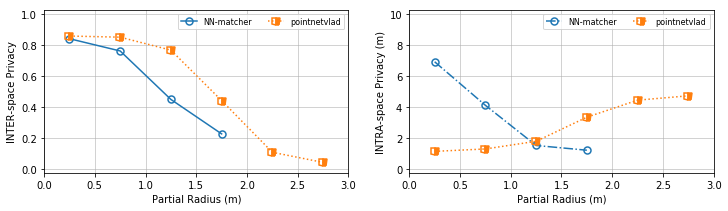

In [13]:
fig=plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(121) 

ax1.grid(alpha = 0.7)
ax1.set_ylim(-0.025,1.025)
ax1.set_xlim(0,3.0)
ax1.set_ylabel("INTER-space Privacy")
ax1.set_xlabel("Partial Radius (m)")

markersize = 7
linewidth = 1.5

RansacNN = np.asarray(results_partials[1])

ax1.plot(
    RansacNN[:,0],
    RansacNN[:,1],
    "-o",
    linewidth = linewidth,
    fillstyle = 'none',
    mew = linewidth,markersize = markersize,
    label = "NN-matcher"
)

ax1.plot(
    pointnetvlad[::2,0],
    pointnetvlad[::2,1],
    ":s",
    linewidth = linewidth,fillstyle = 'right',
    mew = linewidth,markersize = markersize,
    label = "pointnetvlad"
)

ax1.legend(loc = "upper right", ncol = 2, fontsize = 8);

ax2 = fig.add_subplot(122) 

ax2.grid(alpha = 0.7)
ax2.set_ylim(-0.25,10.25)
ax2.set_xlim(0,3)

ax2.set_ylabel("INTRA-space Privacy (m)")
ax2.set_xlabel("Partial Radius (m)")

ax2.plot(
    RansacNN[:,0],
    RansacNN[:,2],
    '-.o',
    linewidth = linewidth,
    fillstyle = 'none',
    mew = linewidth,markersize = markersize,
    label = "NN-matcher"
)

ax2.plot(
    pointnetvlad[::2,0],
    pointnetvlad[::2,2],
    ":s",
    linewidth = linewidth,fillstyle = 'right',
    mew = linewidth,markersize = markersize,
    label = "pointnetvlad"
)

ax2.legend(loc = "upper right", ncol = 2, fontsize = 8);

#plt.savefig('arcore_results/partials-radius-pointnetvlad-jittered.png', format='png', dpi=300,bbox_inches = 'tight')

# Successive case: spatial inference using pointnetvlad

In [ ]:
for radius in np.arange(0.5,2.1,0.5):
    
    pickle_file = 'successive_results_'+str(radius)+'_new.pickle'

    try:
        with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
            results_pickle = pickle.load(pickle_output)
    except:
        print("No "+pickle_file+" file yet.")
        results_pickle = []

    successive_path = 'successive_radius_'+str(radius)
    
    for release in np.arange(1,100,5):

        query_fol = 'release_'+str(release)

        QUERY_FILE = 'pointnetvlad_submaps/successive_queries/3d_jittered_{}_evaluation_query.pickle'.format(successive_path+"_"+query_fol)

        output_file = RESULTS_FOLDER +pickle_file+query_fol+'.txt'

        QUERY_SETS= get_sets_dict(QUERY_FILE)

        query_partial_path = os.path.join(QUERY_PATH,successive_path,query_fol)

        df_test= pd.read_csv(os.path.join(query_partial_path,"pointcloud_centroids_4m.csv"),sep=',')

        QUERY_DATABASE_NUMPY = np.asarray(df_test)

        print("Doing",QUERY_FILE,query_partial_path)

        ave_recall, ave_intra_dist = evaluate(QUERY_SETS, QUERY_DATABASE_NUMPY, output_file)

        results_pickle.append([
                release,
                ave_recall,
                ave_intra_dist
            ])

        with open(RESULTS_FOLDER + pickle_file,'wb') as pickle_output:
            pickle.dump(results_pickle,pickle_output)
    


No successive_results_0.5_new.pickle file yet.
Trajectories Loaded.
Doing pointnetvlad_submaps/successive_queries/3d_jittered_successive_radius_0.5_release_1_evaluation_query.pickle pointnetvlad_submaps/successive_radius_0.5/release_1
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(226, 256)
0 0 Database output: (27912, 256) Queries output: (226, 256)
 Average Inter-space Error: 0.8407079646017699
 Ave Intra-space Distance Error: 1.614335179331336
 Average similarity: 0.82068896
Trajectories Loaded.
Doing pointnetvlad_submaps/successive_queries/3d_jittered_successive_radius_0.5_release_6_evaluation_query.pickle pointnetvlad_submaps/successive_radius_0.5/release_6
Tensor("query_triplets/Mul_1:0", shape=(51, 256), dtype=float32, device=/device:GPU:0)
INFO:tensorflow:Restoring parameters from model/model_3d_4m_jittered_4096.ckpt
Model restored.
(166, 256)


# Results: Successive case with pointnetVLAD (vs NN-matcher)

In [ ]:
pointnetvlad_successive = []

for radius in np.arange(0.5,2.1,0.5):
    
    pickle_file = 'successive_results_'+str(radius)+'_new.pickle'

    pointnetvlad_successive_per_radius = []

    try:
        with open(RESULTS_FOLDER + pickle_file,'rb') as pickle_output:
            results_pickle = pickle.load(pickle_output)
    except:
        print("No results_ransac.")

    for release, recall, intra_dist in results_pickle:
        pointnetvlad_successive_per_radius.append([
            release,
            recall[0],
            intra_dist[0]
        ])

    pointnetvlad_successive_per_radius = np.asarray(pointnetvlad_successive_per_radius)#[-16:]

    pointnetvlad_successive.append(pointnetvlad_successive_per_radius)
    
with open('testing_results/successive/nn_matcher_errors.pickle', 'rb') as f:
    [succ_NN_errors,succ_NN_intra_errors] = pickle.load(f)

In [ ]:
fig=plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(121) 

ax1.grid(alpha = 0.7)
ax1.set_ylim(-0.025,1.025)
ax1.set_xlim(0,100)
ax1.set_ylabel("INTER-space Privacy, $\Pi_1$", fontsize = 14)
ax1.set_xlabel("Number of Releases", fontsize = 14)

markersize = 7
linewidth = 1.5
#plt.minorticks_on()

for radius, inter_errors in succ_NN_errors:#[:2]:

    if radius == 1.5: continue

    #print(RawNN_per_iteration_errors.shape)
    ax1.plot(
        np.arange(1,100,skip)[:len(inter_errors):]+1,
        inter_errors[::], 
        '-o', 
        linewidth = linewidth,fillstyle = 'none',
        mew = linewidth,markersize = min(markersize*(1.25/radius),markersize),
        label = "NN-matcher, r ="+ str(radius)
    )

for i, radius in enumerate(np.arange(0.5,2.1,0.5)):

    if radius == 1.5: continue

    ax1.plot(
        np.arange(1,100,10)+1,
        pointnetvlad_successive[i][::2,1],
        "-s",
        linewidth = linewidth,fillstyle = 'none',
        mew = linewidth,markersize = markersize,
        label = "pointnetvlad, r = "+str(radius)
    )

ax1.legend(loc = "upper right", ncol = 2, fontsize = 8);

ax2 = fig.add_subplot(122) 

ax2.grid(alpha = 0.7)
ax2.set_ylim(-0.25,10.25)
ax2.set_xlim(0,100)

ax2.set_ylabel("INTRA-space Privacy, $\Pi_2$ (m)", fontsize = 14)
ax2.set_xlabel("Number of Releases", fontsize = 14)

for radius, intra_errors in succ_NN_intra_errors:#[:2]:
    
    if radius == 1.5: continue
    
    ax2.plot(
        np.arange(1,100,skip)+1,#[:len(intra_errors):2]+1,
        intra_errors[::,0], 
        '-.o',
        linewidth = linewidth, #capsize = 4.0, 
        #marker = markers[0],
        fillstyle = 'none',
        mew = linewidth,markersize = min(markersize*(1.25/radius),markersize),
        label = "NN-matcher, r ="+ str(radius)
    )

for i, radius in enumerate(np.arange(0.5,2.1,0.5)):

    ax2.plot(
        np.arange(1,100,10)+1,
        pointnetvlad_successive[i][::2,2],
        "-s",
        linewidth = linewidth,fillstyle = 'none',
        mew = linewidth,markersize = markersize,
        label = "pointnetvlad, r = "+str(radius)
    )


ax2.legend(loc = "upper right", ncol = 2, fontsize = 8);

#plt.savefig('arcore_results/partials-radius-pointnetvlad-jittered.png', format='png', dpi=300,bbox_inches = 'tight')